**Цель работы:**

Осуществить предварительную обработку данных csv-файла, выявить и устранить проблемы в этих данных.

# Загрузка набора данных

### Описание предметной области

Вариант № 11

Набор данных: [movies.csv](https://github.com/NeonNik2245/guap_homework_public/blob/main/data_analyze/lab_2/movies2.csv)

Атрибуты:
1. название фильма
2. год выхода фильма
3. оценка
4. количество голосов
5. длительность фильма
6. жанр
7. производство (страна)

### 1.Чтение файла (набора данных), анализ
Файл читается через read_csv. В добавок стоит заранее импортировать matplotlib и seaborn.

In [89]:
# импорт библиотек, чтение файла с помощью pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

url = "https://github.com/NeonNik2245/guap_homework_public/blob/main/data_analyze/lab_2/movies2.csv?raw=true"
df = pd.read_csv(url, sep = ';')

df.info()
print("----")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            384 non-null    object 
 1   release_year     387 non-null    float64
 2   score            386 non-null    float64
 3   number_of_votes  388 non-null    float64
 4   duration         389 non-null    int64  
 5   main_genre       389 non-null    object 
 6   main_production  388 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 21.4+ KB
----


,release_year,score,number_of_votes,duration
count,387.000000,386.000000,3.880000e+02,389.000000
mean,2010.976744,7.512176,1.391523e+05,123.352185
std,10.805726,0.443870,2.365279e+05,28.304800
min,1954.000000,6.900000,1.013900e+04,28.000000
25%,2007.500000,7.100000,2.055375e+04,104.000000
50%,2014.000000,7.400000,4.606950e+04,122.000000
75%,2018.000000,7.800000,1.551585e+05,139.000000
max,2022.000000,9.000000,2.268288e+06,229.000000


In [2]:
# Сразу видим, что есть нулевые значения. Наименования фильмов дальше использоваться не будут, а вот остальные поля будут, надо удалить "лишние" строки.

df = df.dropna(subset=['release_year', 'score', 'number_of_votes', 'duration', 'main_genre', 'main_production'])

# Главный жанр

#df['main_genre'].unique()

# array(['documentary', 'scifi', 'drama', 'comedy', 'western', 'action',
#       'crime', 'thriller', 'war', 'fantasy', 'romance', 'horror',
#       'musical', 'animation', 'sports', 'COMEDY', 'dramaa'], dtype=object)

duplicate = 'COMEDY' # список неправильных названий
name = 'comedy'# правильное название
df['main_genre'] = df['main_genre'].replace(duplicate, name)

duplicate = 'dramaa' # список неправильных названий
name = 'drama'# правильное название
df['main_genre'] = df['main_genre'].replace(duplicate, name)

df['main_production'].unique()

#array(['GB', 'US', 'IN', 'UA', 'CD', 'TR', 'ES', 'AU', 'JP', 'ZA', 'HK',
#       'DE', 'KR', 'CA', 'BE', 'NO', 'NZ', 'MX', 'FR', 'MW', 'TH', 'AR',
#       'PS', 'HU', 'IT', 'CN', 'PL', 'KH', 'IE', 'BR', 'XX', 'LT', 'NL',
#       'DK', 'ID'], dtype=object)

# Нет страны XX
# ~ - отрицание. Условие, что значение в main_production не в списке из XX
df = df[~(df['main_production'].isin(['XX']))]

df.drop_duplicates()

## Выведем вновь

df.info()
print("----")
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 0 to 388
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            382 non-null    object 
 1   release_year     385 non-null    float64
 2   score            385 non-null    float64
 3   number_of_votes  385 non-null    float64
 4   duration         385 non-null    int64  
 5   main_genre       385 non-null    object 
 6   main_production  385 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 24.1+ KB
----


,release_year,score,number_of_votes,duration
count,385.000000,385.000000,3.850000e+02,385.000000
mean,2011.002597,7.513247,1.383909e+05,123.407792
std,10.816052,0.443948,2.366174e+05,28.435828
min,1954.000000,6.900000,1.013900e+04,28.000000
25%,2008.000000,7.100000,2.043000e+04,103.000000
50%,2014.000000,7.400000,4.520000e+04,122.000000
75%,2018.000000,7.800000,1.535080e+05,139.000000
max,2022.000000,9.000000,2.268288e+06,229.000000


### 2. Постройка точечной диаграммы

Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков. Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков. Минимум один график (диаграмму рассеивания) сделать по категориям (Например, зависимость зарплаты и возраста по каждой должности. На таком графике различные должности должны быть показаны разными
цветами).


array([[<Axes: xlabel='release_year', ylabel='release_year'>,
        <Axes: xlabel='score', ylabel='release_year'>,
        <Axes: xlabel='number_of_votes', ylabel='release_year'>,
        <Axes: xlabel='duration', ylabel='release_year'>],
       [<Axes: xlabel='release_year', ylabel='score'>,
        <Axes: xlabel='score', ylabel='score'>,
        <Axes: xlabel='number_of_votes', ylabel='score'>,
        <Axes: xlabel='duration', ylabel='score'>],
       [<Axes: xlabel='release_year', ylabel='number_of_votes'>,
        <Axes: xlabel='score', ylabel='number_of_votes'>,
        <Axes: xlabel='number_of_votes', ylabel='number_of_votes'>,
        <Axes: xlabel='duration', ylabel='number_of_votes'>],
       [<Axes: xlabel='release_year', ylabel='duration'>,
        <Axes: xlabel='score', ylabel='duration'>,
        <Axes: xlabel='number_of_votes', ylabel='duration'>,
        <Axes: xlabel='duration', ylabel='duration'>]], dtype=object)

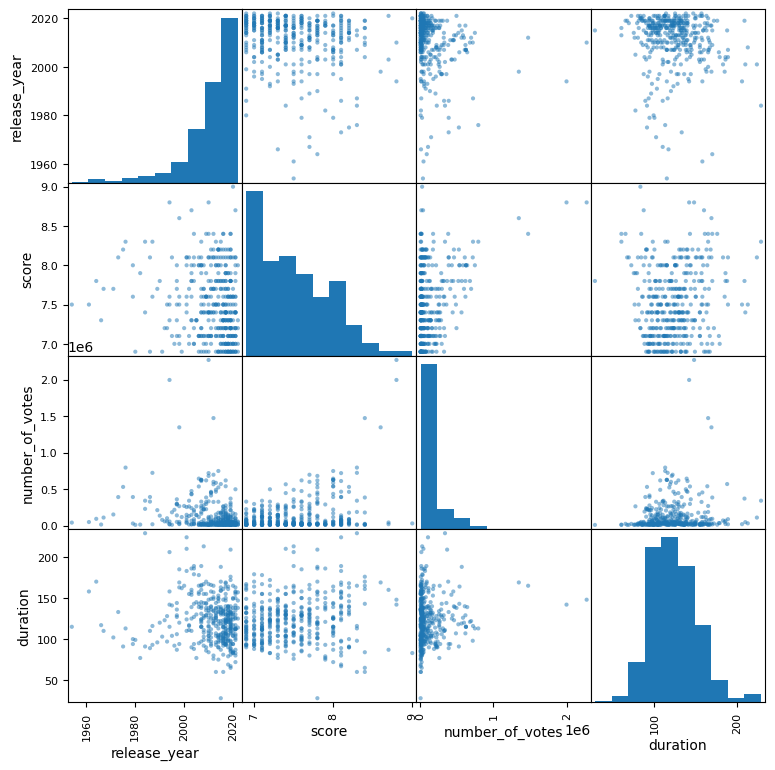

In [3]:
# применить метод plot для построения матрицы диаграмм рассеяния
pd.plotting.scatter_matrix(df, figsize=(9, 9))

Данная матрица показывает диаграммы рассеяния для всех комбинаций числовых параметров.

По диагонали находятся диаграммы (гистограммы) распределения, они показывают количество записей с определёнными значениями и позволяют выявлять аномалии и закономерности.

Анализ данных по матрице:
- По году:
    - Значительно больше оценок было сделано в промежутке между 2000 и 2020, нежели за остальные промежутки времени. Оценки выше 8,5 начали появляться лишь после 1990 года.
    - Количество голосов тоже больше в промежутке 2000-2020 годов, однако в отношении видно, что количества голосов "0" стало куда больше по отношению к 0,5 и 1.
    - С 1960 наблюдалось снижение продолжительности фильмов, затем рост начиная с 1980, пик настал в 2000 году, хотя основная масса фильмов постепенно снижала длительность.
- По оценке:
    - Оценок с рейтингом 9 баллов значительно меньше.
    - Количество голосов у фильмов с высоким рейтингом выше, чем у фиьмов с низким рейтингом.
    - Оценка фильма не показывает видимой зависимости от длительности фильма.
- По количеству голосов:
    - Имеется тенденция на увеличение количества оценок на фильм с годом выхода.
    - Нет видимой зависимости длительности фильма и количества голосов за него

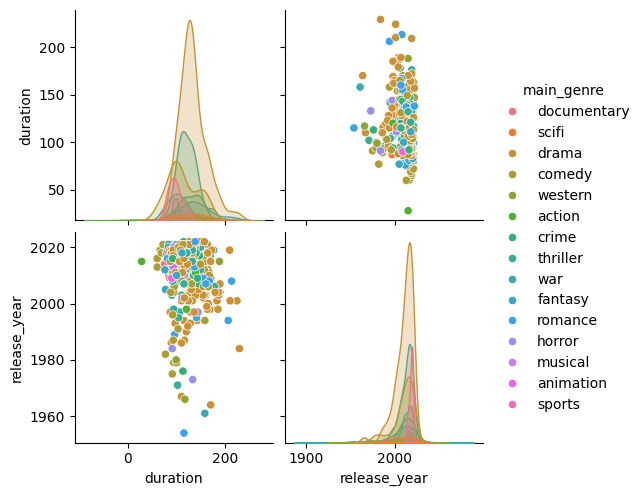

In [4]:
# Гистограмма по категориям.

# Минимум один график (диаграмму рассеивания) сделать по категориям 
# (Например, зависимость зарплаты и возраста по каждой должности. 
# На таком графике различные должности должны быть показаны разными цветами).

sns.pairplot(df[['duration','release_year', 'main_genre']], hue = 'main_genre')

Диаграммы рассеяния должны позволить проследить закономерности не только для всей общности записей, но и для отдельных жанров фильмов. Ключевая проблема заключается в большом количестве точек и большом количестве жанров, из-за чего чтение нужного значения (например, просмотр зависимости длительности от даты выхода для фильмов жанра "war") затрудняется.

# 3 Построение гистограмм

Постройте гистограммы для каждого числового признака, подберите оптимальное количество bins, сделайте выводы по полученными гистограммам.

Для построения гистограмм можно использовать библиотеку pandas и её функцию plot

<Axes: ylabel='Frequency'>

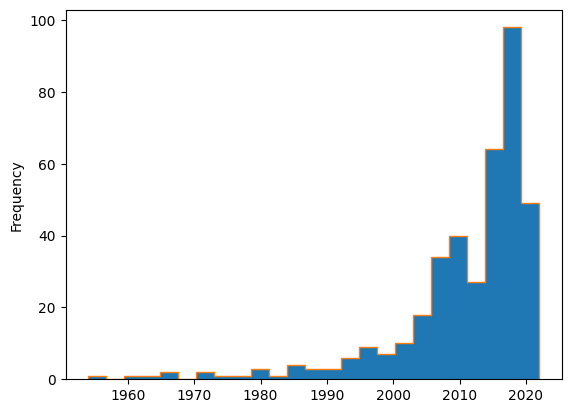

In [5]:
# Числовые признаки

 # release_year
 # score
 # number_of_votes
 # duration

# hist - использование гистограммы. Bins - количество столпов в разделении

# Разделение на 25 даёт столбики по два года
df['release_year'].hist(bins=25)

# То же самое, но через .plot - даёт тот же результат, но из-за типа step рисует только линию, а не закрашивает.
# Линия обводит график, построенный при помощи hist
df['release_year'].plot(kind='hist', bins = 25, histtype = 'step')

Гистограмма показывает, что с 2000 года идёт большой рост количества фильмов в год, однако в 2012 и 2013 была большая просадка по количеству фильмов, а в 2020 наблюдалось второе падение кинопроизводства.

---

Text(0.04, 0.5, 'Number')

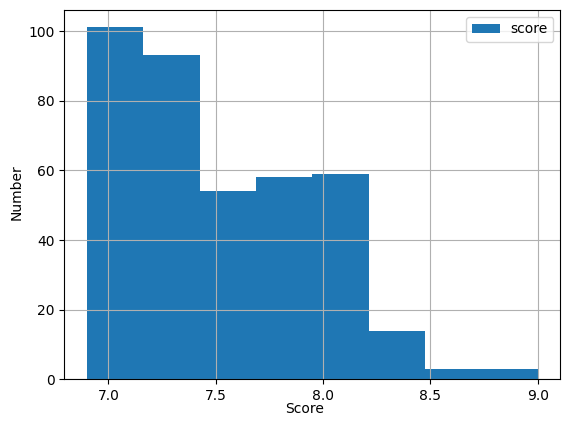

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=1)

# Разделение на 16 даёт столбики по 0,1
# Разделение на 8 - по 0,2
df['score'].hist(bins=8, legend = True)
# plt.xticks(range(0,len(pivot_df.index)), pivot_df.index, rotation=90)
# plt.show()

fig.text(0.5, 0.04, 'Score', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')

По гистограмме видно, что оценок от 7 до 7,5 сильно больше, чем оценок от 7,5 до 8. При этом после оценки 8.3 идёт резкое падение количества оценок до значения меньше 20, а после 8,5 оценка появляется крайне редко.

---

Text(0.04, 0.5, 'Number')

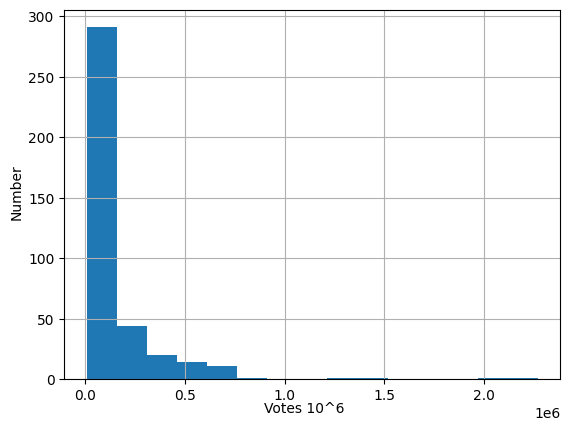

In [51]:
# Разделение на 15 позволяет увидеть градацию между 0.0 и 1.0
fig, axes = plt.subplots(nrows=1, ncols=1)

df['number_of_votes'].hist(bins=15)

fig.text(0.5, 0.04, 'Votes 10^6', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')

Фильмов с количеством голосов от 0 до 0,1 почти 300, далее идёт резкое падение, которое заканчивается на отметке в 0,75. Количество голосов свыше 0.75 крайне мало.

---

Text(0.04, 0.5, 'Number')

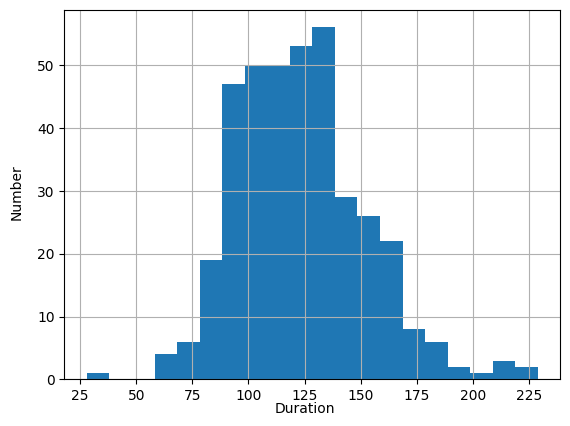

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=1)

# Разделение на 20 даёт столбики по 10 минут фильма
df['duration'].hist(bins=20)

fig.text(0.5, 0.04, 'Duration', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')

Большая часть фильмов имеют длительность в 90-135 минут. Ещё одно множество фильмов лежит в промежутке между 135 и 175 минутами. Фильмы с продолжительностью свыше 175 минут редки, как и фильмы короче 75 минут.

# 4 Корреляция и ковариация

Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Построить heatmap (тепловую карту корреляции). Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными. 

Понимать, что такое корреляция и ковариация.

---

heatmap отсутствует в библиотеке pandas, поэтому будет использована библиотека seaborn.

Просто матрицу корреляции, однако, можно построить и с помощью pandas.

In [62]:
# Матрица корреляции. Коэффициенты расчитаны по формуле Пирсона. Только для числовых значений.
df.corr('pearson', numeric_only = True)

,release_year,score,number_of_votes,duration
release_year,1.000000,-0.152892,-0.214590,-0.104106
score,-0.152892,1.000000,0.352649,0.122002
number_of_votes,-0.214590,0.352649,1.000000,0.099731
duration,-0.104106,0.122002,0.099731,1.000000


In [64]:
# Матрица ковариации
df.cov(numeric_only = True)

,release_year,score,number_of_votes,duration
release_year,116.986972,-0.734149,-5.491926e+05,-32.019291
score,-0.734149,0.197090,3.704433e+04,1.540157
number_of_votes,-549192.611709,37044.327942,5.598780e+10,671027.935708
duration,-32.019291,1.540157,6.710279e+05,808.596293


Отрицательный коэффициент показывает на обратную зависимость: при увеличении года выпуска снижается длительность, снижается количество голосов, снижается рейтинг. Полодительный коэффициент показывает на прямую зависимость: при увеличении рейтинга растёт количество голосов и длительность фильма.

<Axes: >

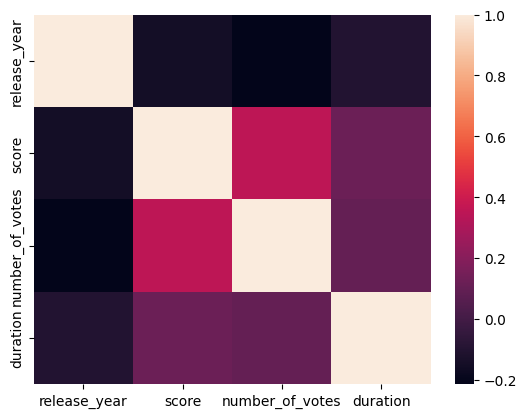

In [10]:

# pivot the dataframe from long to wide form
# result = df.pivot_table(index='release_year', columns='score', values='duration')

# result

# sns.heatmap(result, annot=False, fmt="g", cmap='viridis')
# plt.show()

sns.heatmap(df.corr('pearson', numeric_only = True))


Тепловая карта показывает, насколько одни величины зависят от других. Светлый оттенок показывает на прямую зависимость, а тёмный - на обратную. Тёмно-фиолетовый же указывает на значение корреляции "0". Согласно полученной карте прослеживается статистическая корреляция между оценкой и количеством голосов за фильм - около 0,4. А год выпуска изменяется в обратную сторону от оценок, количества голосов и длительности.

# 5. Построение графиков по варианту

Постройте графики по заданию в варианте. Выполните интерпретацию, что вы видите на этих графиках.


## 5.1 

Задание 1 : Использовать seaborn. Отфильтровать данные - год выхода фильма с 2020. По группировке - год выхода и количество фильмов каждого жанра (main_genre) построить диаграмму.

C:\Users\Никита Пахомчик\AppData\Local\Temp\ipykernel_18028\560767080.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["release_year"] = df_filtered["release_year"].astype(int)


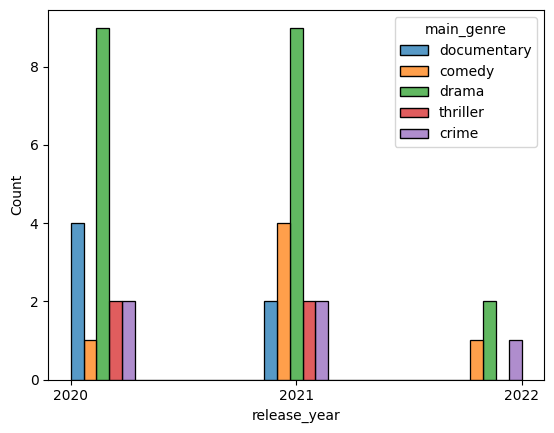

In [94]:
## seaborn - sns

# Гистограмма, цветная.

# Отфильтруем все фильмы ниже 2020
df_filtered = df[df['release_year'] >= 2020]

df_filtered["release_year"] = df_filtered["release_year"].astype(int)

# Выбирается пять наибольших по количеству жанров фильмов за 2020-2025
genre_filter = df_filtered.groupby(by='main_genre')['main_genre'].count().nlargest(5).index

# Выполняем сортировку по полученным жанрам
df_filtered = df_filtered[df_filtered['main_genre'].isin(genre_filter)]

# поскольку жанров слишком много - стоит выбрать 5 самых популярных из 12
ax = sns.histplot(df_filtered, x='release_year', hue='main_genre', multiple="dodge")
# ax.tick_params(axis='x', labelrotation=45)

# А чтобы отображалось только три года: 
# Формат на целые числа
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
# Шаг в 1 единицу
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))

plt.show()

По полученным данным видно, что в 2020 и 2021 выходило много фильмов жанра драмы, по два триллера и преступления. Количество документальных фильмов с 2020 на 2021 сократилось вдвое. В 2022 году ещё не успели снять все фильмы, либо же самые популярные фильмы в 2020 и 2021 испытали сильный спад по своему количеству.

## 5.2

Задание 2. Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить средний рейтинг (score) фильмов по жанрам. Отобразить маркеры в виде треугольников зеленого цвета размером 14, ширину линии сделать 6.

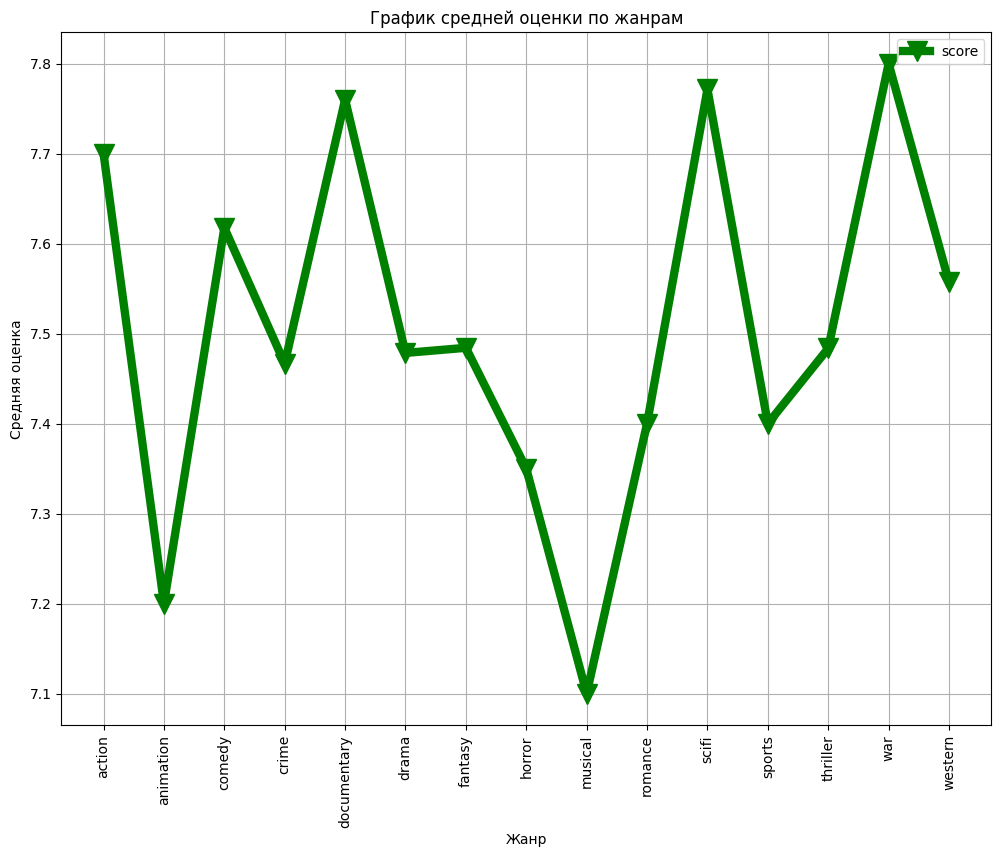

In [44]:
pivot_df = df.pivot_table(index='main_genre', values = 'score', aggfunc='mean')

# pivot_df = pivot_df.reset_index()

pivot_df

pivot_df.plot(marker = 'v', color = 'green', markersize = 14, linewidth = 6, figsize=(12, 9), 
              grid = True, xlabel='Жанр', ylabel='Средняя оценка', title = 'График средней оценки по жанрам')
              
# Вручную указываем xticks 
plt.xticks(range(0,len(pivot_df.index)), pivot_df.index, rotation=90)
plt.show()

Полученный график не несёт полезной нагрузки как график: ось Х не растёт, а меняется, к тому же большое количество значений по оси x привели к тому, что половина из них не выведены. В остальном график позволяет просмотреть оценки по фильмам и сравнить их друг с другом на основании жанра.

# 5.3 

Задание 3: Использовать matplotlib. Отфильтровать данные - год выхода фильма с 2020. Построить круговую диаграмму, которая отображает распределение фильмов по жанрам (отобразите фильмы только 2020 года и выше).

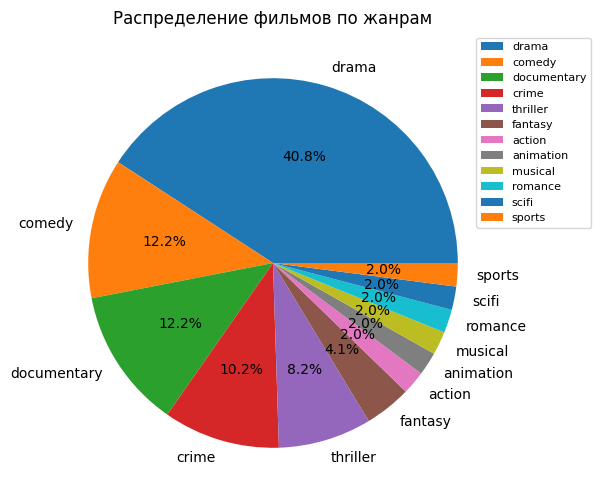

In [13]:
df_filtered = df[df['release_year'] >= 2020]

fig, ax = plt.subplots(figsize = (10,6))

# Сначала посчитаем по жанрам
countes = df_filtered.value_counts('main_genre')

# sizes - размеры каждого кусочка пирога
sizes = countes.values

# labels - подписи к пирогу
labels = countes.axes[0] # Там находится массив с одним индексом.

# Задаются значения в первый параметр, имена во второй, подписи процентов в третий и радиус в четвёртый
ax.pie(countes.values, labels=labels.to_list(), autopct='%1.1f%%', radius = 1)
# Заголовок
ax.set_title("Распределение фильмов по жанрам")

# Легенда подписывает именования в labels, fontsize - размер текста, bbox_to_anchor - положение легенды относительно графика. 
plt.legend(labels, fontsize = 8, bbox_to_anchor = (1.2, 1))

plt.show()

По полученному графику видно, что по количеству фильмов лидируют такие жанры как драма, комедия, документальные и преступления. Они занимают более 75% кинопроката. Для каждого фильма можно посмотреть его процентное отношение к общему количеству фильмов.


---

**Сделать выводы. Вы должны понимать, что означает тот или иной столбец, чтобы
 ответить на вопросы на защите.**


 ---


# 6. График hexagonal binning plot

Выполните минимум один любой график типа hexagonal binning plot. Сделайте выводы.

<Axes: title={'center': 'Гексагональный график оценок от года выпуска'}, xlabel='release_year', ylabel='score'>

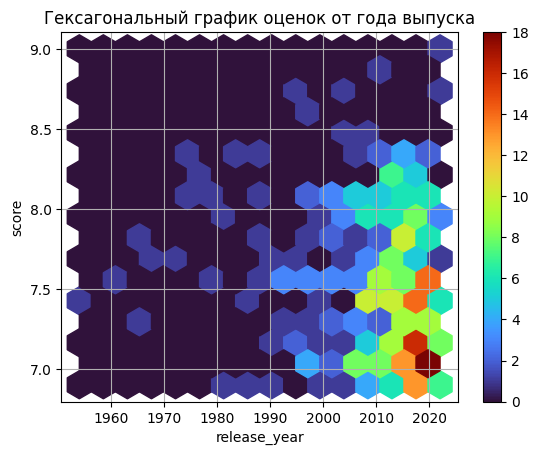

In [14]:
df.plot(x='release_year', y='score', kind='hexbin',gridsize=15, grid=True, title='Гексагональный график оценок от года выпуска',colormap='turbo')


По цветовой гамме можно определять частоту встречи значений в определённом диапазоне. По сути схоже с точечной диаграммой, но более наглядно (цветом) выделяет частоту встречи точек. Как видно, самые частые значения - 2020 год (+-2 года) и оценки около 7 и 7.5. На тёмно-синем хорошо видно чуть более светлые шестиугольники - это единичные точки. Такие есть до 1960, в промежутках между 1960 и 2000, или с оценками выше 8.5.

---

# 7. График "Ящик с усами"

Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.

<Axes: >

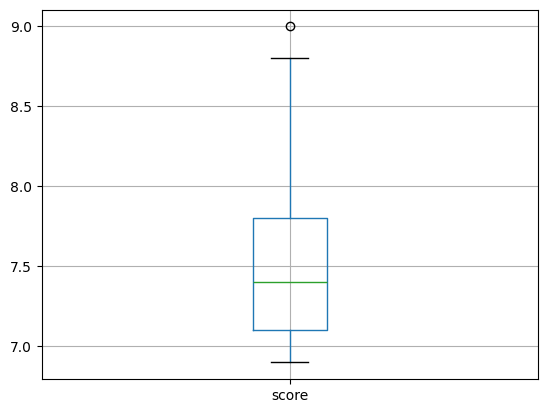

In [15]:
df.boxplot(column='score')

Ящик (прямоугольник) находится в промежутке между приблизительно 7.1 и 7.8. Нижняя граница - первый квантиль (25%), верхняя - третий квантиль (75%), зелёная линия на оценке 7.4 - второй квантиль (50%). "Усы" выбрасываются на 1,5 размаха между первым и третьим квантилем. Если "ус" получается больше, чем максимальное (минимальное) значение, то ус подстраивается и заканчивается в максимальном (минимальном) значении, как это произошло на оценке 6.9. Над концом верхнего уса видно точку - это выброс: значение, выходящее за установленные значения ящика с усами. В анализе позволяет находить и убирать аномальные значения.

---

# 8. Категоризация и Boxplot

Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).

Сперва надо было выбрать числовой столбец из следующего списка:
- Год выпуска
- Оценка
- Количество голосов
- Длительность

Поскольку далее потребуется создание boxplot по этому же столбцу, был выбран столбец с длительностью.
Фильмы длительностью до часа включительно можно считать короткими, более двух часов - длинными

<Axes: title={'center': 'duration'}, xlabel='duration_category'>

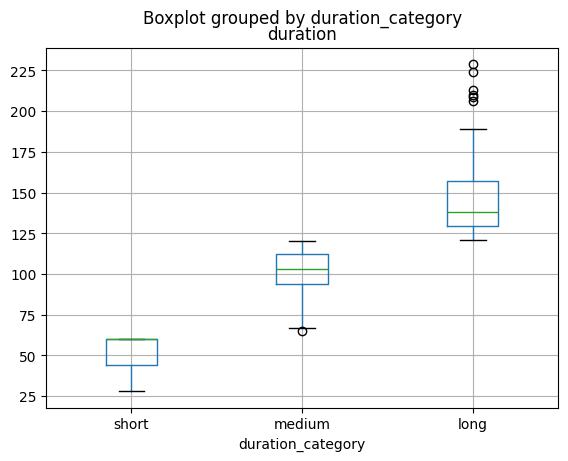

In [16]:
df

df.loc[:, 'duration_category'] = pd.cut(df.loc[:,'duration'], bins=[0, 60, 120, float('inf')], 
                                     labels = ['short', 'medium', 'long'])

df.boxplot(by='duration_category', column='duration')

В категории коротких фильмов зелёная черта совпадает с третьим квартелем и верхним усом, это указывает на то, что из всей категории коротких фильмов более половины имеют длительность в 60 минут. При этом длительность менее 45 минут имеют только 25% фильмов этой категории, а за пределами усов нет выпадающих точек. Итого 25% фильмо имеют длительность ниже 45 минут.

В категории средней длительности можно посмотреть как среднюю длину фильмов, так и положение первого и третьего квартилей. Здесь тоже есть смещение к верху - то есть 75% фильмов занимают длительность от 95 минут, более половины выше ~100 минут, и лишь 25% дольше 115 минут. 

В категории длинных фильмов смещение идёт уже к низу: большая часть фильмов (75%) по длительности не превышают 155 минут, хотя и имеются особо длинные фильмы, отображённые точками за пределами усов.

# 10. Boxplot и категории
Выполните ещё минимум 2 графика boxplot по другим категориям (например, зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на ном графике). Используйте для построения графиков разные библиотеки (минимум 2). Сделайте вывод.

Можно выполнить несколько разных графиков, рассматривающих зависимость двух величин, одна из которых не является численной. Ящик с усами идеально подходит для подобного анализа. В качестве первого варианта можно рассмотреть ящик с усами, построенный по жанру фильма и его длительности.

<Axes: title={'center': 'duration'}, xlabel='main_genre'>

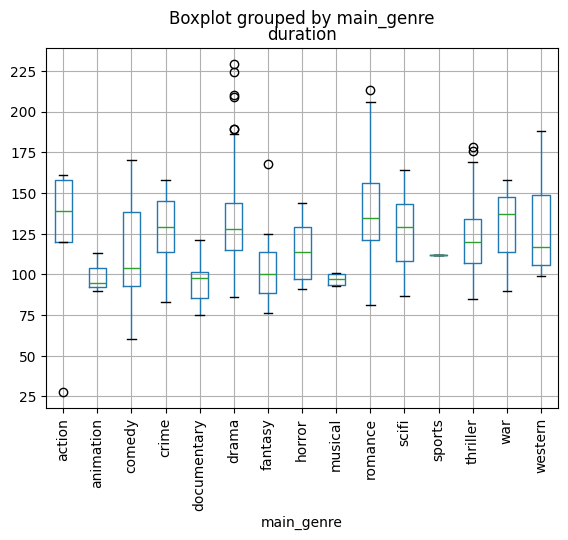

In [17]:
df.boxplot(by='main_genre', column='duration', rot=90)

Как видно по графику, некоторые фильмы в большинстве своём (от 25% до 75% по длительности) сильно короче остальных. Ящик с усами позволяет посмотреть не только среднее значение, но и разброс от него по 25% выборки. Например, фильмы жанра scifi и romance схожи по средней длительности, но имеют разые размеры ящика и разные размеры усов. Так, видно, что фильм жанра романтики более распространены по своей длительности, чем scifi. Мьюзиклы и документальные фильмы гораздо короче драмы или комедии.

Второй вариант строится по стране выпуска и оценке фильма

C:\Users\Никита Пахомчик\AppData\Local\Temp\ipykernel_18028\2841531605.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


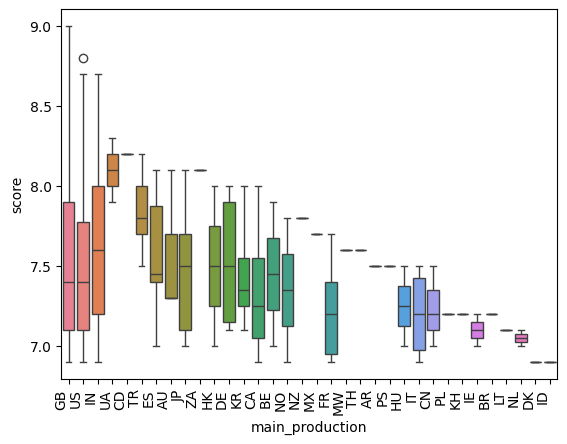

In [20]:
ax = sns.boxplot(df, x='main_production', y='score', hue='main_production')
# Чтобы не сливались подписи стран - получим метки с оси x и повернём их на 90 градусов
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

Seaborn автоматически выполнил сортировку по максимальным оценкам в каждой группе. Pandas такого автоматически не сделал. Полученный график позволяет получить информацию о средней оценке по стране, об основном "теле" фильмов (половина фильмов Британии находятся в промежутке от 7.1 до 7.9) и о максимальной и минимальной оценке. Подобный график подвержен влиянию случайных фильмов с высокими оценками (Поэтому Америка левее Индии), но при этом показывает одновременно несколько операций с данными: Максимальные, минимальные, средние значения, положение первого и третьего квартилей.


---

**Вы должны аргументировать на защите, почему были выполнены те или иные действия с пропусками, а также знать другие способы работы с пропусками, чтобы
 ответить на вопросы на защите.**


 ---

### Вывод


***`Сделать расширенный вывод. `***

В процессе выполнения лабораторной работы ключевой задачей выступило взаимодействие с библиотеками matplotlib, seaborn и pandas. Эти библиотеки могут работать друг с другом и выполнять схожие задачи, однако отличаются по своему способу работы. В дополнение к изучению библиотек прошло изучение моделей для анализа данных, среди них: ящик с усами, круговые диаграммы, гексагональные диаграммы, гистограммы, точечные диаграммы, коэффициенты корреляции.
Полученные знания позволят в будущем изучать большие объёмы данных при попощи полученных во время выполнения лабораторной работы знаний. Главной проблемой при выполнении работы были необычные особенности работы seaborn и, в особенности, matplotlib, сильно отличающихся от работы с pandas.
